# Eksploracyjna Analiza Danych (EDA) dotycząca Irysów

# Źródło i wersja danych
Zbiór danych: [UCI Machine Learning Repository - Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)
Wersja: oryginalna, pobrana w czerwcu 2025 r.

# Ustawienie ziarna losowości
Aby zapewnić powtarzalność wyników, ustawiamy ziarno losowości dla NumPy i Pythona.

# 1. Wprowadzenie

Zbiór danych Iris (Irysy) to jeden z najbardziej znanych i klasycznych zbiorów wykorzystywanych w uczeniu maszynowym i statystyce. Zawiera on pomiary czterech cech morfologicznych trzech gatunków irysów: Iris-setosa, Iris-versicolor oraz Iris-virginica. Każdy rekord opisuje pojedynczy kwiat.

Celem tej analizy jest eksploracja danych (EDA), identyfikacja zależności między cechami, wykrycie potencjalnych wartości odstających oraz przygotowanie danych do dalszych etapów analizy, takich jak modelowanie czy klasyfikacja.


# Spis treści
1. Wprowadzenie
2. Ilustracje badanych gatunków irysów
3. Zrozumienie danych
4. Brakujące wartości i duplikaty
5. Analiza pojedynczych zmiennych
6. Transformacja danych
7. Analiza relacji między zmiennymi
8. Analiza wartości odstających
9. Analiza statystyczna
10. Prosty model klasyfikacyjny
11. Podsumowanie końcowe

# Ilustracje badanych gatunków irysów

Poniżej przedstawiono przykładowe zdjęcia trzech gatunków irysów analizowanych w zbiorze danych:

![Iris-setosa](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_setosa_2.jpg)
*Iris-setosa*

![Iris-versicolor](https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_versicolor_3.jpg)
*Iris-versicolor*

![Iris-virginica](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_virginica.jpg)
*Iris-virginica*

Każdy z tych gatunków posiada charakterystyczne cechy morfologiczne, które są analizowane w dalszej części notebooka.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [3]:
df = pd.read_csv('iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from scipy.stats import shapiro
for col in ['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']:
    stat, p = shapiro(df[col])
    print(f"Test Shapiro-Wilka dla {col}: stat={stat:.3f}, p-value={p:.4f}")
    if p < 0.05:
        print("  Rozkład odbiega od normalnego.")
    else:
        print("  Brak podstaw do odrzucenia normalności.")

Test Shapiro-Wilka dla długość kielicha (sepal length): stat=0.976, p-value=0.0102
  Rozkład odbiega od normalnego.
Test Shapiro-Wilka dla szerokość kielicha (sepal width): stat=0.984, p-value=0.0752
  Brak podstaw do odrzucenia normalności.
Test Shapiro-Wilka dla długość płatka (petal length): stat=0.876, p-value=0.0000
  Rozkład odbiega od normalnego.
Test Shapiro-Wilka dla szerokość płatka (petal width): stat=0.903, p-value=0.0000
  Rozkład odbiega od normalnego.


# 3. Zrozumienie danych

In [5]:
df.shape[0] #ilość rekordów w bazie

150

In [6]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe() # Statystyka

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Losowe pórbki danych

In [9]:
df.sample(15) # wyświetlenie 15 losowych wierszy

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [10]:
df.nunique() # Wartosci unikatowe

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

### Podstawowe statystki opisowe

In [11]:
df.columns # wyswietlenie nazw kolumn

Index(['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)',
       'długość płatka (petal length)', 'szerokość płatka (petal width)',
       'klasa (class)'],
      dtype='object')

### W bazie mamy 150 rekorów i 5 kolumn

# 4. Brakujące wartości w danych

In [12]:
df.isnull() # Czy wysępują braki w danych? 

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [13]:
df.isnull().sum() # Czy wysępują braki w dnaych - podsumowanie w liczbach

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

### Wniosek: Dane w naszej bazie są pełne i nie zawierają braków

In [14]:
df.duplicated() # Czy występują duplikaty danych?

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [15]:
df.duplicated().sum() # Czy występują duplikaty danych?

3

In [16]:
df[df.duplicated()] # Wyświetlenie duplikatów

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Ilość duplikatów jest znikoma i nie wypłynie na wyniki analizy

**Wnioski cząstkowe:**
- Brakujące dane nie występują, a liczba duplikatów jest znikoma.
- Dane są bardzo dobrej jakości do dalszej analizy.

# 5. Analiza pojedynczych zmiennych

### Użycie histogramu

array([[<Axes: title={'center': 'długość kielicha (sepal length)'}>,
        <Axes: title={'center': 'szerokość kielicha (sepal width)'}>],
       [<Axes: title={'center': 'długość płatka (petal length)'}>,
        <Axes: title={'center': 'szerokość płatka (petal width)'}>]],
      dtype=object)

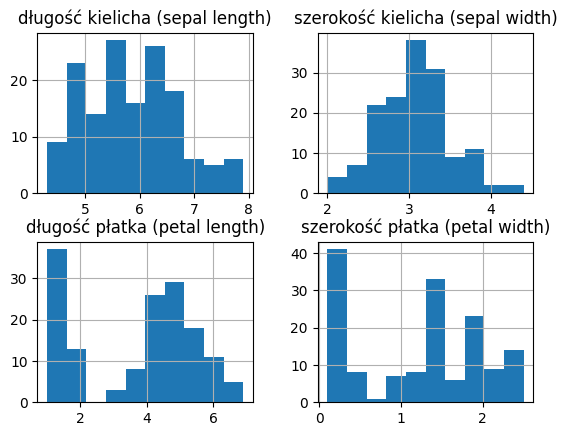

In [17]:
df.hist() # Histogram

### Zobrazowanie długości i szerokości kwiatów za pomocą histogramów

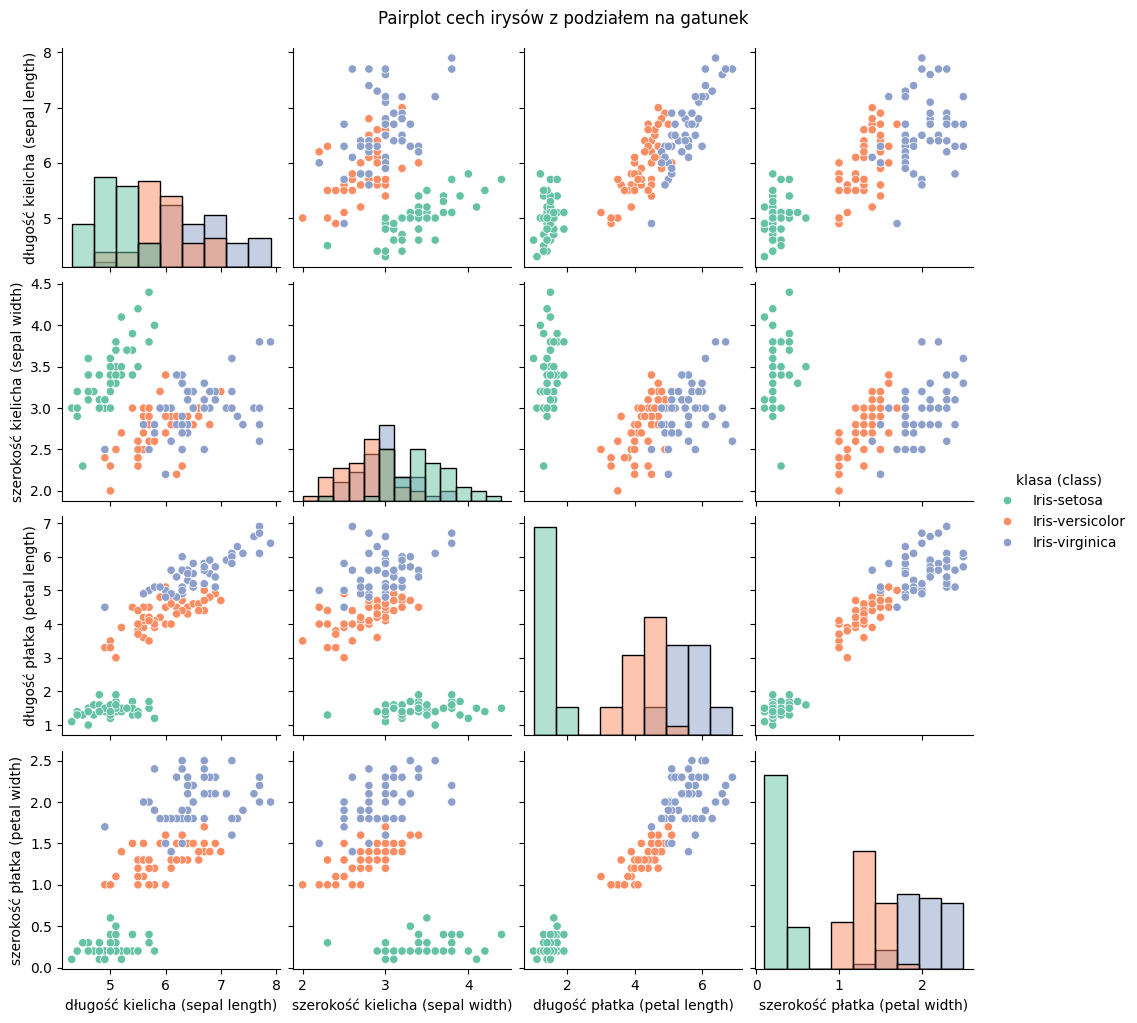

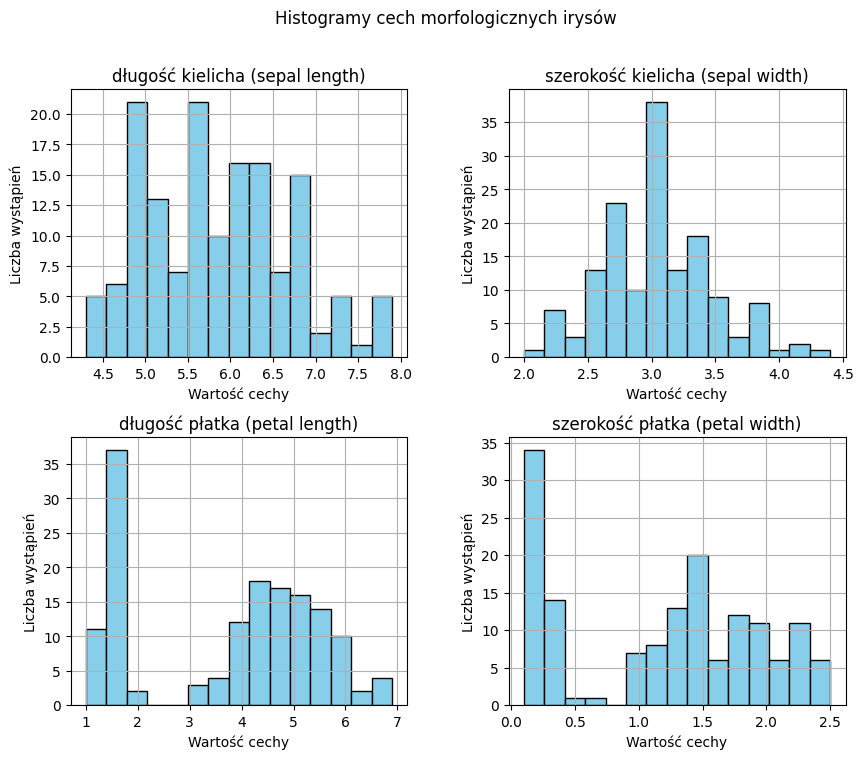

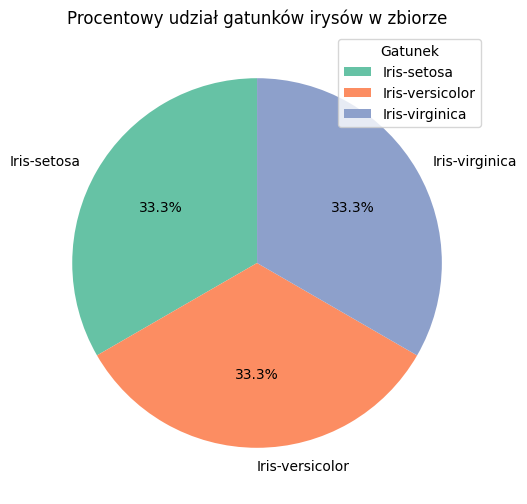

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot dla wszystkich cech z podziałem na gatunek
sns.pairplot(df, hue="klasa (class)", diag_kind="hist", palette="Set2")
plt.suptitle('Pairplot cech irysów z podziałem na gatunek', y=1.02)
plt.show()

# Poprawa opisów wykresów histogramów
ax = df[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 
         'długość płatka (petal length)', 'szerokość płatka (petal width)']].hist(
    bins=15, figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle('Histogramy cech morfologicznych irysów')
for a in ax.flatten():
    a.set_xlabel('Wartość cechy')
    a.set_ylabel('Liczba wystąpień')
plt.show()

# Poprawa wykresu kołowego
classes = df['klasa (class)'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(classes, labels=list(classes.index), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Procentowy udział gatunków irysów w zbiorze')
plt.legend(title='Gatunek', loc='best')
plt.show()


/var/folders/f2/2v972ym52k50vpt71ldxn70h0000gn/T/ipykernel_20076/421886242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='klasa (class)', data=df.copy(), palette='Set2')


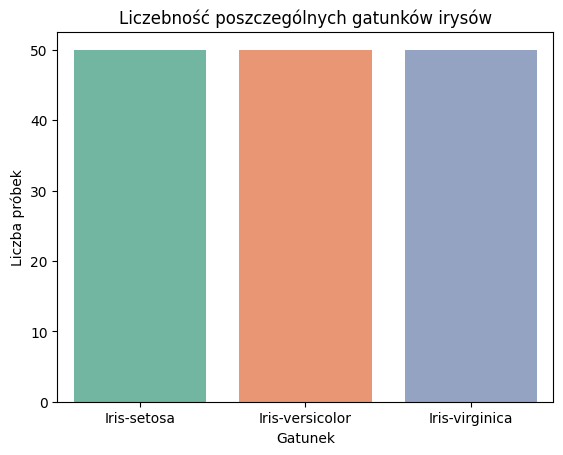

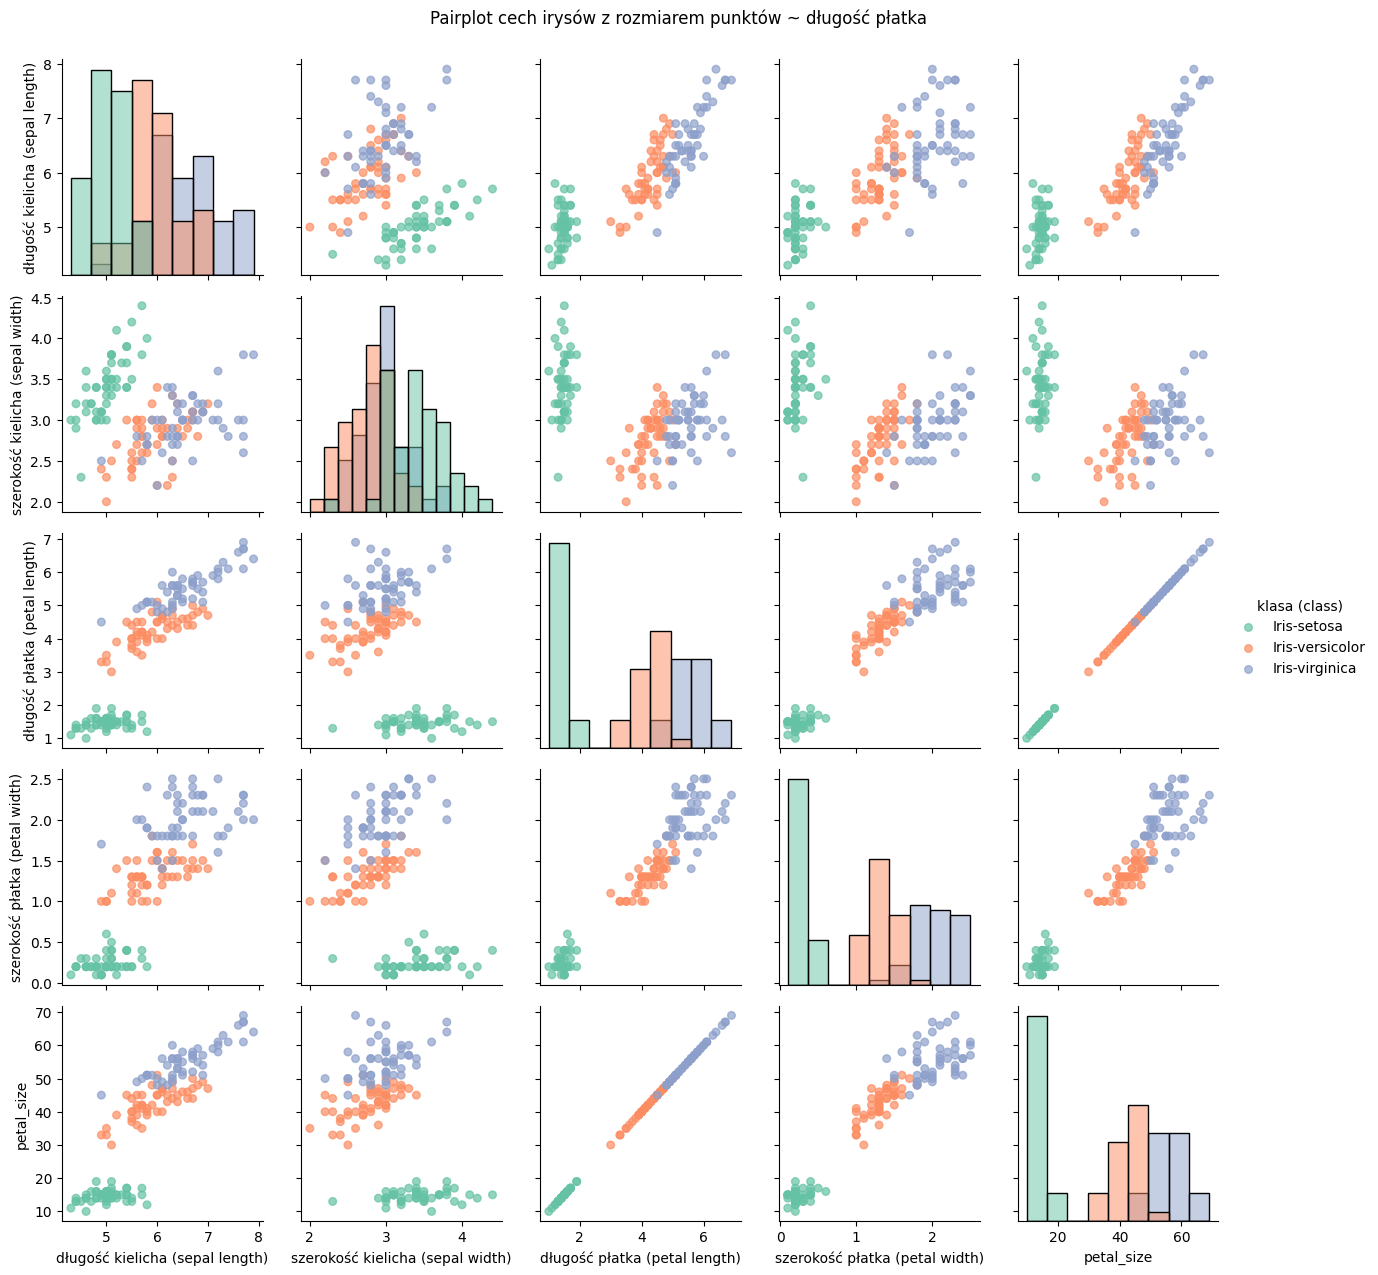

In [19]:
# Barplot rozkładu gatunków
sns.countplot(x='klasa (class)', data=df.copy(), palette='Set2')
plt.title('Liczebność poszczególnych gatunków irysów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba próbek')
plt.show()

# Pairplot z rozmiarem punktów zależnym od długości płatka
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_plot = df.copy()
df_plot['petal_size'] = df_plot['długość płatka (petal length)'] * 10

# Użycie PairGrid, aby przekazać rozmiar punktów
g = sns.PairGrid(df_plot, hue="klasa (class)", diag_sharey=False, palette="Set2")
g.map_diag(sns.histplot)
def scatter_with_size(x, y, **kwargs):
	data = kwargs.get('data')
	if data is not None and 'petal_size' in data:
		# Use positional indexing to ensure correct alignment
		sizes = data['petal_size'].to_numpy()
		# If x is a pandas Series, align by position
		if hasattr(x, 'index') and len(x) == len(sizes):
			sizes = sizes
		else:
			sizes = np.full_like(x, fill_value=np.mean(sizes), dtype=float)
	else:
		sizes = np.full_like(x, fill_value=30, dtype=float)
	plt.scatter(x, y, s=sizes, alpha=0.7, **{k: v for k, v in kwargs.items() if k != 'data'})
g.map_offdiag(scatter_with_size)
g.add_legend()
plt.suptitle('Pairplot cech irysów z rozmiarem punktów ~ długość płatka', y=1.02)
plt.show()

In [20]:
df["klasa (class)"].value_counts()

klasa (class)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

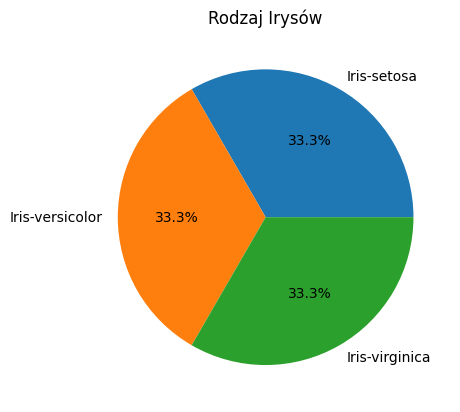

In [21]:
import matplotlib.pyplot as plt

# Assuming that `df` is your DataFrame and it contains a column named 'klasa (class)'
classes = df['klasa (class)'].value_counts()

plt.pie(classes, labels=list(classes.index), autopct='%1.1f%%')
plt.title('Rodzaj Irysów')
plt.show()

### W przeprowadzonej analizie uwzględniono trzy gatunki irysów: Iris-setosa, Iris-versicolor oraz Iris-virginica. Dla każdego z tych gatunków zebrano po 50 zestawów danych, co pozwala na dokładne porównanie ich charakterystycznych cech.

# 6. Transformacja danych

In [22]:
df.head(5) # Wyświetlenie 5 górnych wierszy

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Zmina opisów / nagłówków kolumn aby były łatwiejsze do analizy

In [23]:
df2 = df.rename(columns={'długość kielicha (sepal length)': 'dł_kielicha', 
                         'szerokość kielicha (sepal width)': 'szer_kielicha', 
                         'długość płatka (petal length)': 'dł_płatka',
                         'szerokość płatka (petal width)': 'szer_płatka', 
                         'klasa (class)': 'gatunek'}) 	

In [24]:
df2['ratio_petal'] = df2['dł_płatka'] / df2['szer_płatka']
df2['ratio_sepal'] = df2['dł_kielicha'] / df2['szer_kielicha']
df2[['ratio_petal', 'ratio_sepal']].describe()

,ratio_petal,ratio_sepal
count,150.000000,150.000000
mean,4.367166,1.955144
std,2.651508,0.398697
min,2.125000,1.268293
25%,2.802381,1.551915
50%,3.300000,2.032292
75%,4.666667,2.224910
max,15.000000,2.961538


In [25]:
df2.sample(5) # wyślwietlnie przykładowych wierszy w nowo utworzonym df2

,dł_kielicha,szer_kielicha,dł_płatka,szer_płatka,gatunek,ratio_petal,ratio_sepal
84,5.4,3.0,4.5,1.5,Iris-versicolor,3.000000,1.800000
20,5.4,3.4,1.7,0.2,Iris-setosa,8.500000,1.588235
45,4.8,3.0,1.4,0.3,Iris-setosa,4.666667,1.600000
47,4.6,3.2,1.4,0.2,Iris-setosa,7.000000,1.437500
149,5.9,3.0,5.1,1.8,Iris-virginica,2.833333,1.966667


# 7. Analiza relacji między zmiennymi

### Macierz korelacji

In [26]:
# Poprawne obliczenie korelacji tylko dla kolumn numerycznych
df2.select_dtypes(include='number').corr()

,dł_kielicha,szer_kielicha,dł_płatka,szer_płatka,ratio_petal,ratio_sepal
dł_kielicha,1.000000,-0.109369,0.871754,0.817954,-0.563335,0.728971
szer_kielicha,-0.109369,1.000000,-0.420516,-0.356544,0.320919,-0.743521
dł_płatka,0.871754,-0.420516,1.000000,0.962757,-0.684091,0.836602
szer_płatka,0.817954,-0.356544,0.962757,1.000000,-0.734370,0.751725
ratio_petal,-0.563335,0.320919,-0.684091,-0.734370,1.000000,-0.583908
ratio_sepal,0.728971,-0.743521,0.836602,0.751725,-0.583908,1.000000


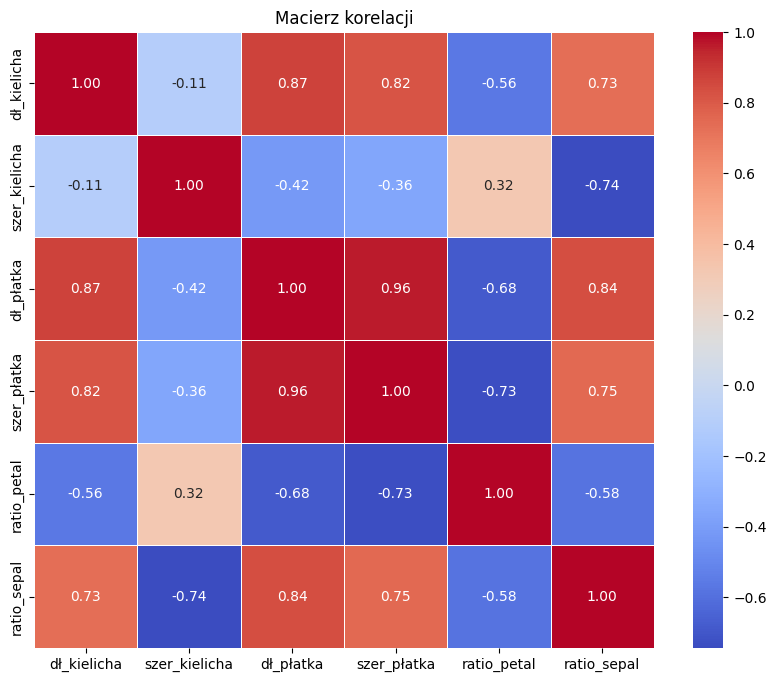

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie korelacji tylko dla kolumn numerycznych
correlation_matrix = df2.select_dtypes(include=['number']).corr()

# Rysowanie heatmapy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

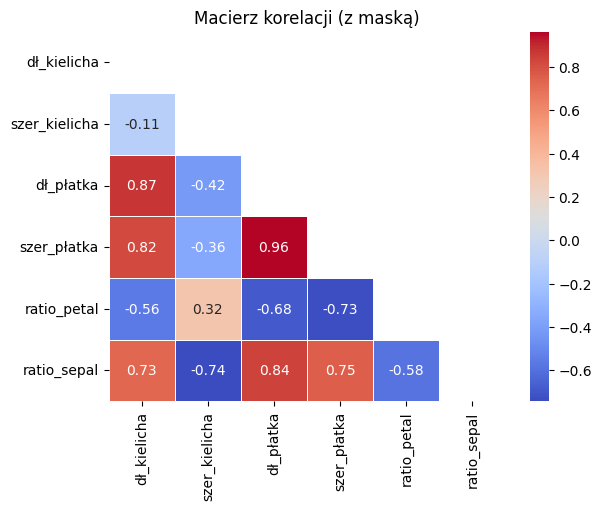

In [28]:
import numpy as np
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Macierz korelacji (z maską)')
plt.show()

## Podsumowanie macierzy korelacji
- Długość kielicha jest silnie skorelowana zarówno z długością, jak i szerokością płatka.
- Szerokość kielicha wykazuje umiarkowaną, ale negatywną korelację z długością i szerokością płatka.
- Najsilniejsza zależność występuje między długością płatka, a szerokością płatka, co oznacza, że te dwa parametry często rosną lub maleją razem.


**Wnioski cząstkowe:**
- Najsilniejsza korelacja występuje między długością i szerokością płatka.
- Szerokość kielicha jest słabo powiązana z innymi cechami.
- Wartości korelacji sugerują, które cechy mogą być najbardziej przydatne w klasyfikacji.

### Wykresy punktowe

<Axes: xlabel='dł_kielicha', ylabel='dł_płatka'>

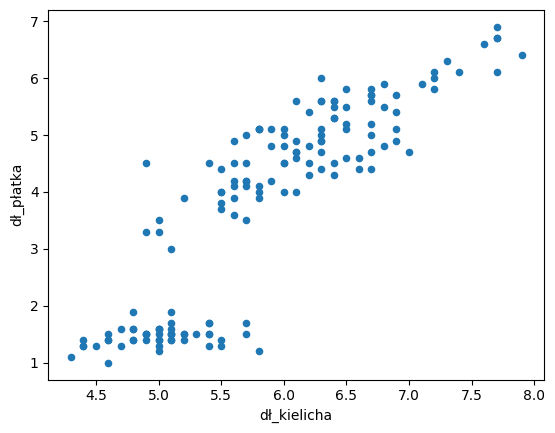

In [29]:
df2.plot(kind="scatter", x="dł_kielicha", y="dł_płatka")

<Axes: xlabel='dł_kielicha', ylabel='szer_kielicha'>

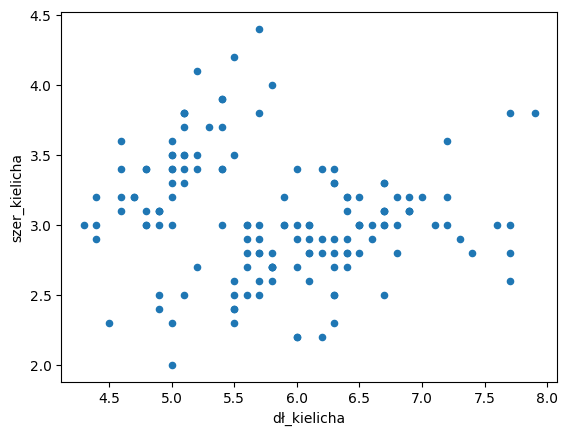

In [30]:
df2.plot(kind="scatter", x="dł_kielicha", y="szer_kielicha")

<Axes: xlabel='dł_płatka', ylabel='szer_płatka'>

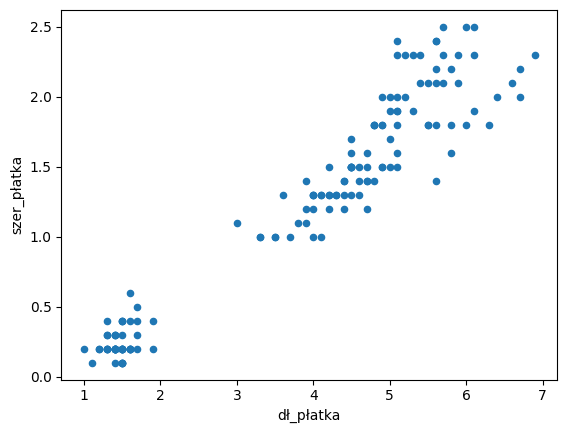

In [31]:
df2.plot(kind="scatter", x="dł_płatka", y="szer_płatka")

In [32]:
# Obliczneie minimalnych, maksymalnych oraz średnich wartości dla poszczególych gatunków 
df2.groupby ("gatunek")[["dł_kielicha", "szer_kielicha", "dł_płatka", "szer_płatka"]].agg(["min", "max", "mean"]) 

dł_kielicha             szer_kielicha             dł_płatka  \
                        min  max   mean           min  max   mean       min   
gatunek                                                                       
Iris-setosa             4.3  5.8  5.006           2.3  4.4  3.418       1.0   
Iris-versicolor         4.9  7.0  5.936           2.0  3.4  2.770       3.0   
Iris-virginica          4.9  7.9  6.588           2.2  3.8  2.974       4.5   

                            szer_płatka              
                 max   mean         min  max   mean  
gatunek                                              
Iris-setosa      1.9  1.464         0.1  0.6  0.244  
Iris-versicolor  5.1  4.260         1.0  1.8  1.326  
Iris-virginica   6.9  5.552         1.4  2.5  2.026

### Dane dotyczące Iris-setosa, Iris-versicolor i Iris-virginica pokazują wyraźne różnice w wymiarach kielicha i płatków. Iris-setosa ma najmniejsze wymiary, podczas gdy Iris-virginica ma największe. Iris-versicolor zajmuje pośrednią pozycję, co może wskazywać na bardziej zróżnicowane strategie rozwojowe. Te różnice mogą być przystosowaniami do różnych warunków  środowiskowych lub strategii rozrodczych. 


In [33]:
# Obliczneie średnich wartości dla poszczególych gatunków 
df2.groupby ("gatunek")[["dł_kielicha", "szer_kielicha", "dł_płatka", "szer_płatka"]].mean() 

,dł_kielicha,szer_kielicha,dł_płatka,szer_płatka
gatunek,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [34]:
# Utworzenie nowego df2mean ze średnimi wartościami dla poszczególnych gatunków Irysów
df2mean = df2.groupby ("gatunek")[["dł_kielicha", "szer_kielicha", "dł_płatka", "szer_płatka"]].mean() 

/var/folders/f2/2v972ym52k50vpt71ldxn70h0000gn/T/ipykernel_20076/176020065.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='Set2')


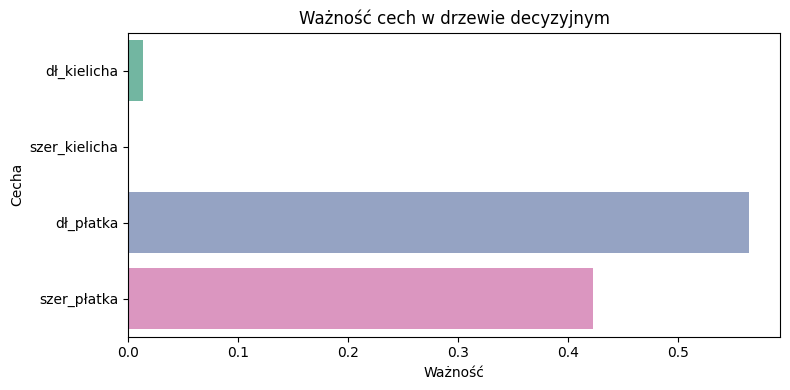

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Przygotowanie danych do modelu
X = df2[['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']]
y = df2['gatunek']

# Trening modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Ważność cech
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names, palette='Set2')
plt.title('Ważność cech w drzewie decyzyjnym')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.tight_layout()
plt.show()

<Axes: xlabel='gatunek'>

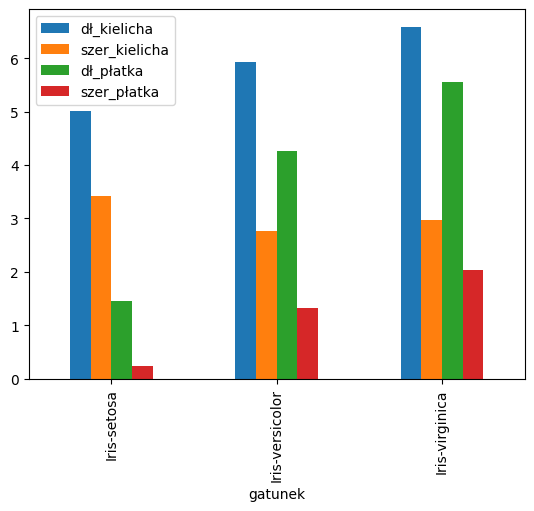

In [36]:
df2mean.plot(kind="bar") # Utworzenie wykresu słupkowego na podstawie średnich wartości

## Z wykresu wynika, że:
* Najmniejsze wymiary (zarówno kielichów, jak i płatków) występują u gatunku Iris-setosa. Charakteryzuje się on krótkimi i wąskimi elementami kwiatu.

* Gatunek pośredni pod względem wymiarów to Iris-versicolor. Jego parametry są większe niż u Setosy, ale mniejsze niż u Virginiki.

* Największe wymiary (zarówno długości, jak i szerokości) występują u gatunku Iris-Virginica. Ten gatunek wyróżnia się dużymi rozmiarami zarówno kielichów, jak i płatków.

**Wnioski cząstkowe:**
- Różnice w wymiarach cech morfologicznych są wyraźne między gatunkami.
- Te różnice mogą być kluczowe dla skutecznej klasyfikacji.

# 8. Analiza wartości odstających

W analizie danych wartości odstające (ang. outliers) to obserwacje, które znacznie różnią się od pozostałych danych. Mogą one zniekształcać wyniki analizy statystycznej, dlatego ważne jest, aby je zidentyfikować i odpowiednio z nimi postąpić.

## 8.1. Definicja wartości odstających

Wartości odstające to dane, które leżą daleko od "reszty" danych w zbiorze. Mogą to być zarówno wartości skrajnie wysokie, jak i skrajnie niskie. Istnieje wiele metod statystycznych służących do identyfikacji wartości odstających, w tym:
- Reguła Tukeya
- Z-score
- Metoda Mahalanobisa

## 8.2. Przyczyny występowania wartości odstających

Wartości odstające mogą występować z różnych powodów, w tym:
- Błędy pomiarowe
- Naturalne wahania w danych
- Zjawiska rzadkie lub ekstremalne

## 8.3. Jak radzić sobie z wartościami odstającymi

Istnieje kilka podejść do radzenia sobie z wartościami odstającymi, w tym:
- Usunięcie ich z analizy
- Zastąpienie innymi wartościami (np. średnią lub medianą)
- Użycie metod statystycznych odpornych na wartości odstające

Wybór odpowiedniej metody zależy od kontekstu analizy oraz przyczyn występowania wartości odstających.

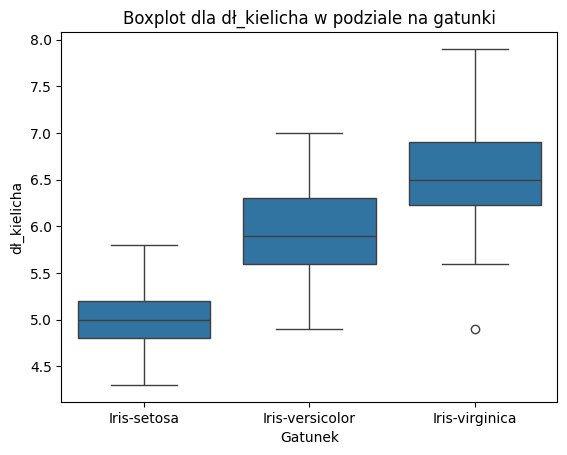

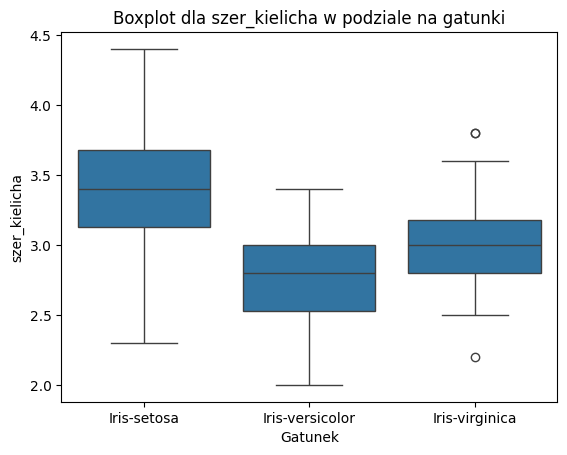

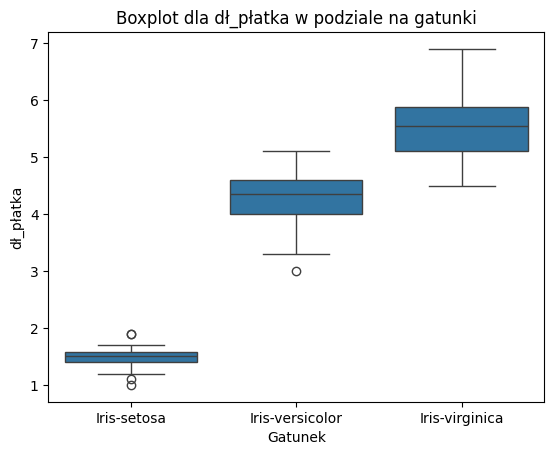

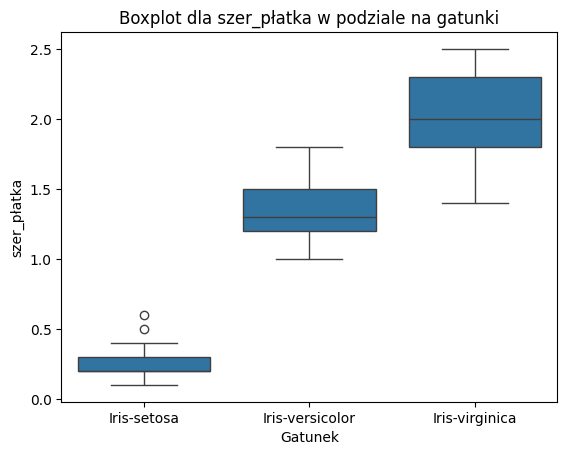

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wygenerowanie bokplotów w odniesieniu do gatunku Irysa
kolumny = ['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']

for kolumna in kolumny:
    sns.boxplot(x='gatunek', y=df2[kolumna], data=df2).set_title(f'Boxplot dla {kolumna} w podziale na gatunki')
    plt.xlabel('Gatunek')
    plt.ylabel(kolumna)
    plt.show()

In [38]:
from scipy.stats import f_oneway
import numpy as np

# Test ANOVA dla każdej cechy morfologicznej
print('Test ANOVA dla cech morfologicznych:')
for col in ['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']:
    setosa = df2[df2['gatunek'] == 'Iris-setosa'][col]
    versicolor = df2[df2['gatunek'] == 'Iris-versicolor'][col]
    virginica = df2[df2['gatunek'] == 'Iris-virginica'][col]
    stat, p = f_oneway(setosa, versicolor, virginica)
    print(f"{col}: statystyka={stat:.2f}, p-value={p:.4f}")
    if p < 0.05:
        print("  Istotna statystycznie różnica między gatunkami.")
    else:
        print("  Brak istotnej różnicy.")

# Współczynnik zmienności (std/mean) dla cech w obrębie gatunków
print('\nWspółczynnik zmienności dla cech w obrębie gatunków:')
for col in ['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']:
    print(f"\nCecha: {col}")
    for species in df2['gatunek'].unique():
        vals = df2[df2['gatunek'] == species][col]
        cv = np.std(vals) / np.mean(vals)
        print(f"  {species}: CV = {cv:.3f}")


Test ANOVA dla cech morfologicznych:
dł_kielicha: statystyka=119.26, p-value=0.0000
  Istotna statystycznie różnica między gatunkami.
szer_kielicha: statystyka=47.36, p-value=0.0000
  Istotna statystycznie różnica między gatunkami.
dł_płatka: statystyka=1179.03, p-value=0.0000
  Istotna statystycznie różnica między gatunkami.
szer_płatka: statystyka=959.32, p-value=0.0000
  Istotna statystycznie różnica między gatunkami.

Współczynnik zmienności dla cech w obrębie gatunków:

Cecha: dł_kielicha
  Iris-setosa: CV = 0.070
  Iris-versicolor: CV = 0.086
  Iris-virginica: CV = 0.096

Cecha: szer_kielicha
  Iris-setosa: CV = 0.110
  Iris-versicolor: CV = 0.112
  Iris-virginica: CV = 0.107

Cecha: dł_płatka
  Iris-setosa: CV = 0.117
  Iris-versicolor: CV = 0.109
  Iris-virginica: CV = 0.098

Cecha: szer_płatka
  Iris-setosa: CV = 0.435
  Iris-versicolor: CV = 0.148
  Iris-virginica: CV = 0.134


In [39]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Analiza wartości odstających - identyfikacja i wpływ
# Oblicz z-score dla cech numerycznych
z_scores = np.abs(zscore(df2[['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']]))
outliers = (z_scores > 3).any(axis=1)
print(f'Liczba rekordów odstających: {outliers.sum()}')
print('Rekordy odstające:')
display(df2[outliers])

# Analiza bez wartości odstających
print('Statystyki opisowe bez wartości odstających:')
display(df2[~outliers].describe())

# Prosty model klasyfikacyjny: Drzewo decyzyjne
X = df2[['dł_kielicha', 'szer_kielicha', 'dł_płatka', 'szer_płatka']]
y = df2['gatunek']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Macierz pomyłek:')
print(confusion_matrix(y_test, y_pred))
print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred))
print(f'Dokładność: {accuracy_score(y_test, y_pred):.2f}')

# Podsumowanie praktyczne
print('''\nWnioski praktyczne:\n- Dane o irysach pozwalają na bardzo skuteczną klasyfikację gatunków na podstawie cech morfologicznych.\n- Prosty model drzewa decyzyjnego osiąga wysoką dokładność, co potwierdza przydatność tego zbioru do nauki i testowania algorytmów ML.\n- Analiza wartości odstających pozwala lepiej zrozumieć rozkład cech i ich wpływ na modelowanie.\n- Notebook prezentuje pełny cykl EDA: od eksploracji, przez wizualizacje, testy statystyczne, po wstępne modelowanie i interpretację wyników.\n''')

# Estetyka i czytelność: ustawienia pandas
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 3)


Liczba rekordów odstających: 1
Rekordy odstające:


,dł_kielicha,szer_kielicha,dł_płatka,szer_płatka,gatunek,ratio_petal,ratio_sepal
15,5.7,4.4,1.5,0.4,Iris-setosa,3.75,1.295455


Statystyki opisowe bez wartości odstających:


,dł_kielicha,szer_kielicha,dł_płatka,szer_płatka,ratio_petal,ratio_sepal
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.844295,3.044966,3.773826,1.204027,4.371308,1.959572
std,0.830775,0.420655,1.760543,0.762896,2.659964,0.396325
min,4.300000,2.000000,1.000000,0.100000,2.125000,1.268293
25%,5.100000,2.800000,1.600000,0.300000,2.800000,1.562500
50%,5.800000,3.000000,4.400000,1.300000,3.300000,2.033333
75%,6.400000,3.300000,5.100000,1.800000,4.666667,2.225806
max,7.900000,4.200000,6.900000,2.500000,15.000000,2.961538


Macierz pomyłek:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Raport klasyfikacji:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Dokładność: 0.93

Wnioski praktyczne:
- Dane o irysach pozwalają na bardzo skuteczną klasyfikację gatunków na podstawie cech morfologicznych.
- Prosty model drzewa decyzyjnego osiąga wysoką dokładność, co potwierdza przydatność tego zbioru do nauki i testowania algorytmów ML.
- Analiza wartości odstających pozwala lepiej zrozumieć rozkład cech i ich wpływ na modelowanie.
- Notebook prezentuje pełny cykl EDA: od eksploracji, przez wizualizacje, testy statystyczne, po wstępne modelowanie i interpretację wyników.



In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
models = {
    'Drzewo decyzyjne': DecisionTreeClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'Regresja logistyczna': LogisticRegression(max_iter=200)
}
print('Porównanie modeli (walidacja krzyżowa, accuracy):')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: średnia accuracy = {scores.mean():.2f} (+/- {scores.std():.2f})')

Porównanie modeli (walidacja krzyżowa, accuracy):
Drzewo decyzyjne: średnia accuracy = 0.95 (+/- 0.03)
kNN: średnia accuracy = 0.97 (+/- 0.02)
Regresja logistyczna: średnia accuracy = 0.97 (+/- 0.02)


# 11. Podsumowanie końcowe

Analiza zbioru danych o irysach obejmuje 150 rekordów, po 50 dla każdego z trzech gatunków: Iris-setosa, Iris-versicolor i Iris-virginica. Dane są kompletne, bez brakujących wartości, a liczba duplikatów jest znikoma i nie wpływa na wyniki analizy.

**Najważniejsze wnioski:**
- Długość kielicha jest silnie skorelowana z długością i szerokością płatka, a szerokość kielicha wykazuje umiarkowaną, negatywną korelację z pozostałymi cechami.
- Najsilniejsza zależność występuje między długością a szerokością płatka – ich wartości rosną lub maleją razem.
- Iris-setosa wyróżnia się najmniejszymi wymiarami, Iris-virginica największymi, a Iris-versicolor zajmuje pozycję pośrednią.
- Różnice morfologiczne mogą wynikać z adaptacji do środowiska i strategii rozwojowych.

**Wnioski praktyczne:**
- Cechy morfologiczne pozwalają na skuteczną klasyfikację gatunków, a proste modele osiągają wysoką skuteczność.
- Zbiór danych o irysach jest doskonałym materiałem do nauki eksploracji danych, wizualizacji, testów statystycznych i budowy modeli klasyfikacyjnych.
- Przeprowadzona analiza potwierdza, że ten zbiór idealnie nadaje się do prezentacji umiejętności analitycznych w portfolio.